In [71]:
mpg<-read.table("auto-mpg.txt",col.names = c("mpg","cylinders","displacement","horsepower","weight","acceleration","year","origin","name"),colClasses = c("numeric","integer","numeric","numeric","numeric","numeric","integer","factor","character"),na.strings = "?")
str(mpg)
summary(mpg)

'data.frame':	398 obs. of  9 variables:
 $ mpg         : num  18 15 18 16 17 15 14 14 14 15 ...
 $ cylinders   : int  8 8 8 8 8 8 8 8 8 8 ...
 $ displacement: num  307 350 318 304 302 429 454 440 455 390 ...
 $ horsepower  : num  130 165 150 150 140 198 220 215 225 190 ...
 $ weight      : num  3504 3693 3436 3433 3449 ...
 $ acceleration: num  12 11.5 11 12 10.5 10 9 8.5 10 8.5 ...
 $ year        : int  70 70 70 70 70 70 70 70 70 70 ...
 $ origin      : Factor w/ 3 levels "1","2","3": 1 1 1 1 1 1 1 1 1 1 ...
 $ name        : chr  "chevrolet chevelle malibu" "buick skylark 320" "plymouth satellite" "amc rebel sst" ...


      mpg          cylinders      displacement     horsepower        weight    
 Min.   : 9.00   Min.   :3.000   Min.   : 68.0   Min.   : 46.0   Min.   :1613  
 1st Qu.:17.50   1st Qu.:4.000   1st Qu.:104.2   1st Qu.: 75.0   1st Qu.:2224  
 Median :23.00   Median :4.000   Median :148.5   Median : 93.5   Median :2804  
 Mean   :23.51   Mean   :5.455   Mean   :193.4   Mean   :104.5   Mean   :2970  
 3rd Qu.:29.00   3rd Qu.:8.000   3rd Qu.:262.0   3rd Qu.:126.0   3rd Qu.:3608  
 Max.   :46.60   Max.   :8.000   Max.   :455.0   Max.   :230.0   Max.   :5140  
                                                 NA's   :6                     
  acceleration        year       origin      name          
 Min.   : 8.00   Min.   :70.00   1:249   Length:398        
 1st Qu.:13.82   1st Qu.:73.00   2: 70   Class :character  
 Median :15.50   Median :76.00   3: 79   Mode  :character  
 Mean   :15.57   Mean   :76.01                             
 3rd Qu.:17.18   3rd Qu.:79.00                             


There are 6 obs with `horsepower` missing. Since this is a small number comparing to $N=398$, we decide to omit the missing data.

In [73]:
mpg<-na.omit(mpg)

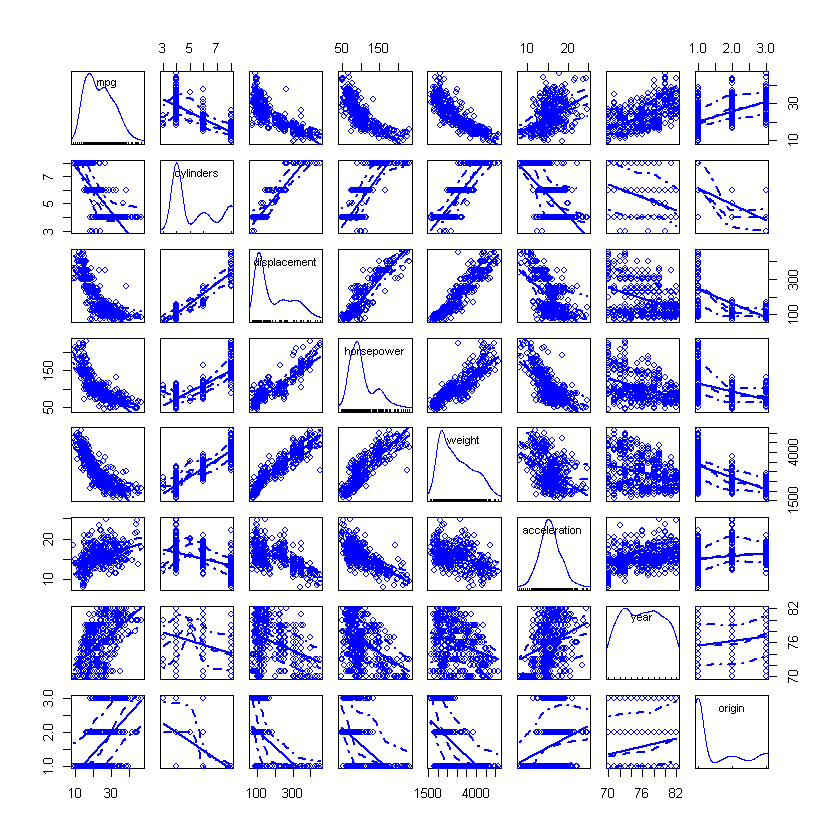

In [3]:
car::scatterplotMatrix(mpg[,-9])

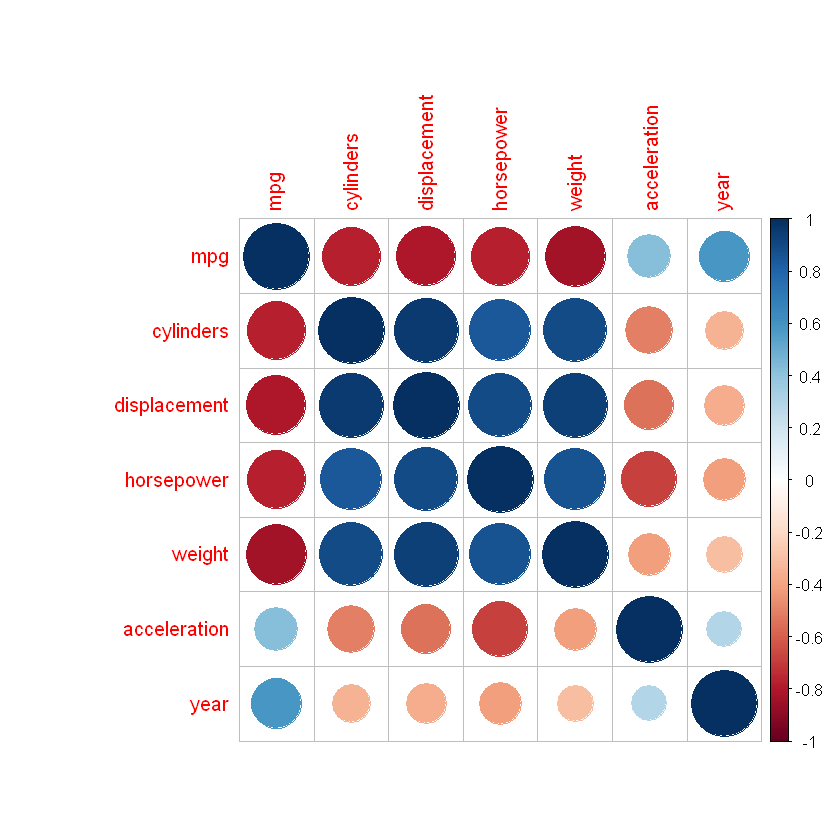

In [4]:
corrplot::corrplot(cor(mpg[,-c(8,9)]))

We see that some predictors are correlated with each other, especially `cylinders`, `displacement`, `horsepower`, and `weight`.

# Variable Transformation

We first choose the transformation of predictors.This is meant to transform the predictors into **Multinormality**.

In [5]:
summary(car::powerTransform(mpg[,3:6]))

bcPower Transformations to Multinormality 
             Est Power Rounded Pwr Wald Lwr Bnd Wald Upr Bnd
displacement   -0.0509           0      -0.2082       0.1065
horsepower     -0.1249           0      -0.2693       0.0194
weight         -0.0870           0      -0.2948       0.1208
acceleration    0.3061           0      -0.0255       0.6376

Likelihood ratio test that transformation parameters are equal to 0
 (all log transformations)
                                 LRT df    pval
LR test, lambda = (0 0 0 0) 4.872911  4 0.30059

Likelihood ratio test that no transformations are needed
                                 LRT df       pval
LR test, lambda = (1 1 1 1) 390.0777  4 < 2.22e-16

Since all of the predictors range over less than one order of magnitude, it may not be very necessary to transform the predictors. However, from the scatter plot matrix, we see that there seems to be a nonlinear relationship between the response `mpg` and many of the predictors. We then use the Box-Cox transformation and try to find the $\lambda$ that minimizes the $RSS(\lambda)$ (Residual Sum of Squares). This is realized by the `MASS::boxcox()` function.

lambda,RSS
<dbl>,<dbl>
-0.37207,2339.654
-1.00000,2590.510
0.00000,2426.553
1.00000,3451.246


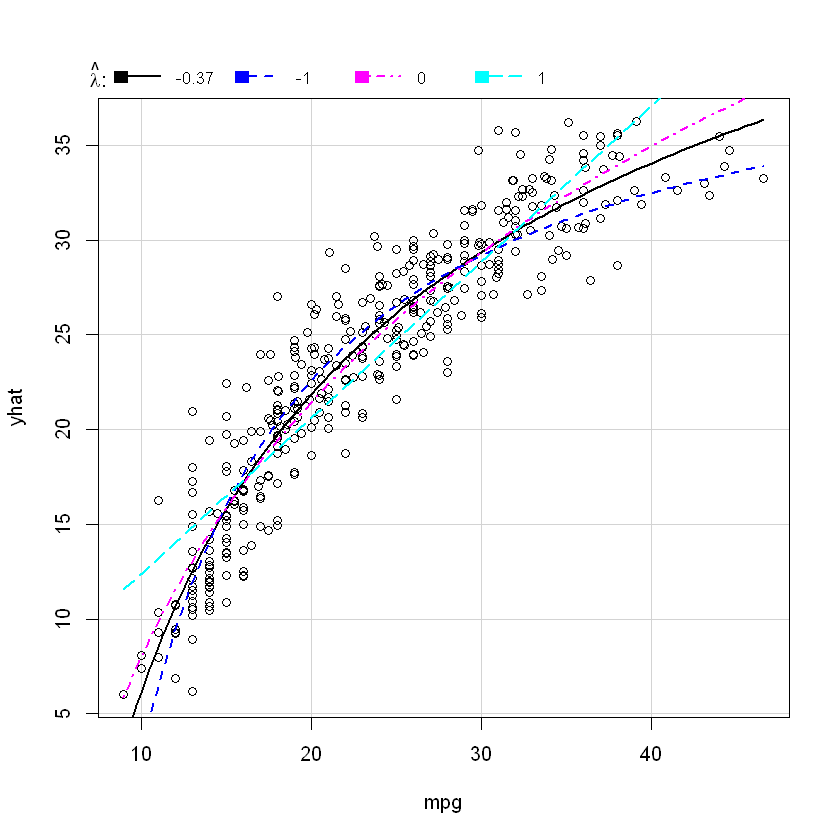

In [6]:
car::inverseResponsePlot(lm(mpg~.,data=mpg[,-9]))

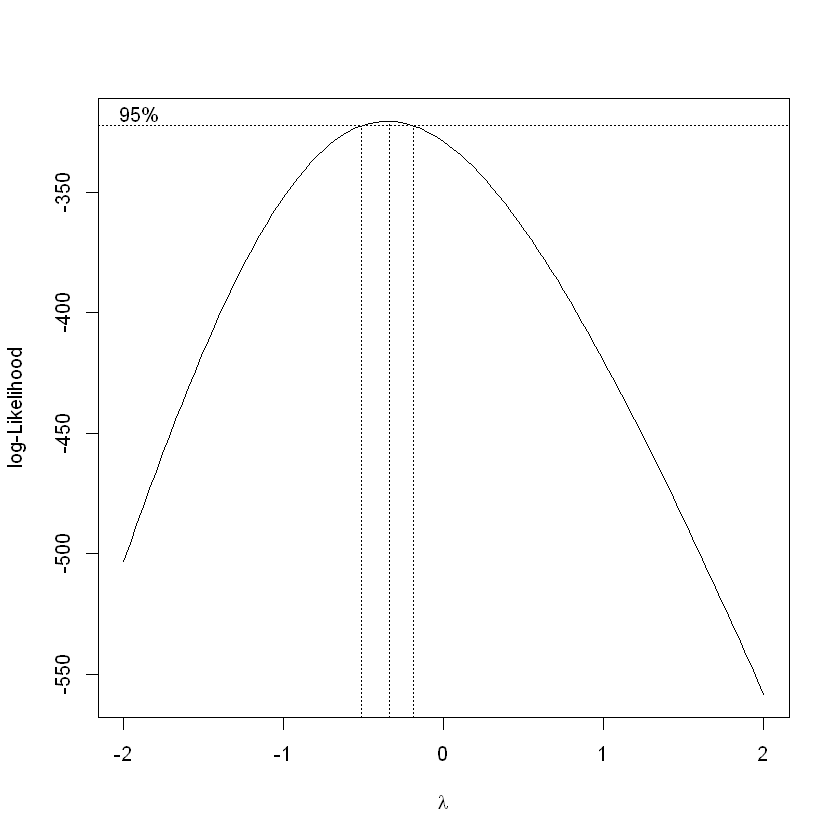

In [7]:
MASS::boxcox(lm(mpg~.,data=mpg[,-9]))

The estimated $\hat \lambda$ is -0.37. It is plausible to consider $\lambda=0$, $\lambda=-0.5$, or $\lambda=-1$. Nonetheless, it is preferred to use the transformation given by $\lambda=-1$, namely $1/Y$, because it gives a very natural interpretation. Other than the US who uses $\textbf {mpg}$, most areas use the unit $\textbf {L/100km}$ for fuel consumption, which is just proportional to the inverse of its value in mpg.

In [72]:
mpg$lp100km<-100/mpg$mpg*0.621371192*3.78541178
#car::inverseResponsePlot(lm(lp100km~., data=mpg[,-c(1,9)]))

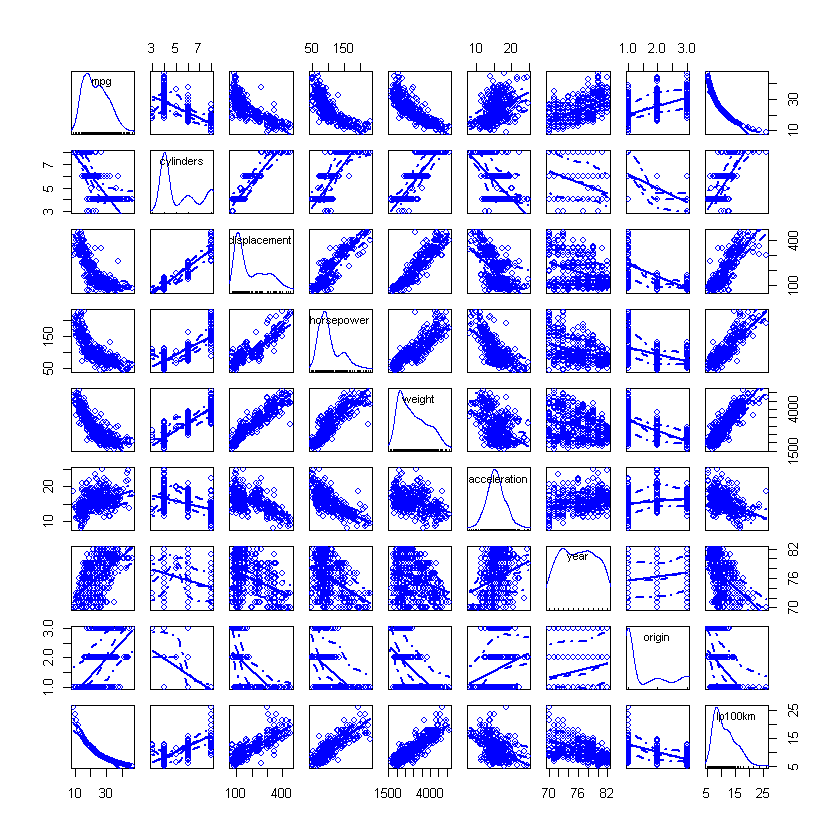

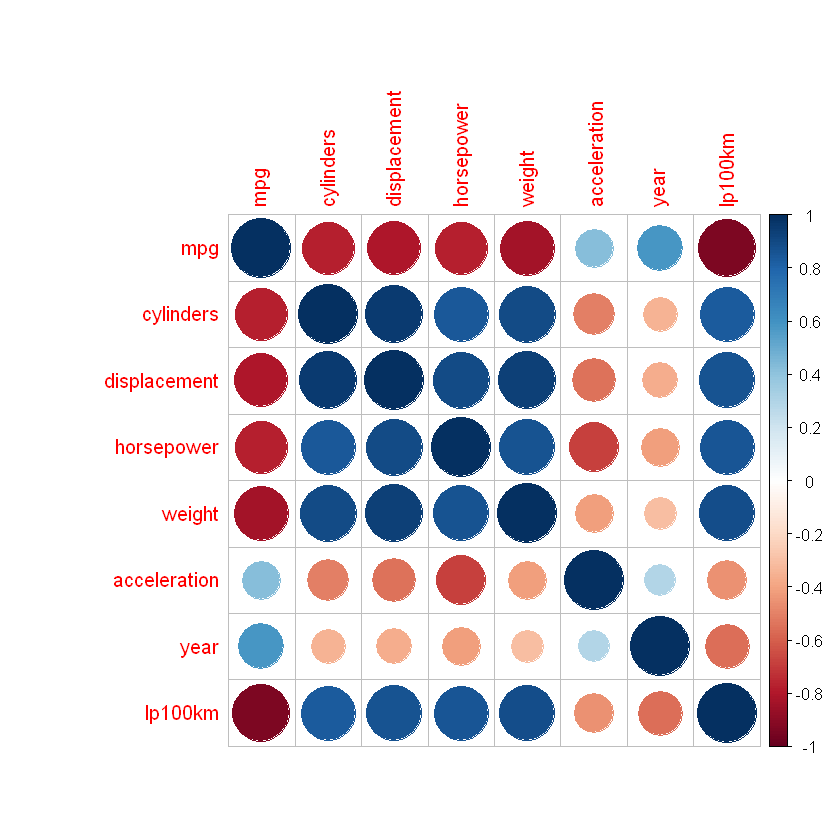

In [35]:
car::scatterplotMatrix(mpg[,-9])
corrplot::corrplot(cor(mpg[,-c(8,9)]))

We hereafter choose `lp100km` as the response variable instead of `mpg`.

# Variable Selection via Best Subset Regression

In [44]:
lm.subset<-leaps::regsubsets(lp100km~.,data=mpg[,-c(1,9)])
#lm.subset<-leaps::regsubsets(lp100km~.,data=mpg[,c(2:5,10)])
summary.subset<-summary(lm.subset)
summary.subset

Subset selection object
Call: regsubsets.formula(lp100km ~ ., data = mpg[, -c(1, 9)])
8 Variables  (and intercept)
             Forced in Forced out
cylinders        FALSE      FALSE
displacement     FALSE      FALSE
horsepower       FALSE      FALSE
weight           FALSE      FALSE
acceleration     FALSE      FALSE
year             FALSE      FALSE
origin2          FALSE      FALSE
origin3          FALSE      FALSE
1 subsets of each size up to 8
Selection Algorithm: exhaustive
         cylinders displacement horsepower weight acceleration year origin2
1  ( 1 ) " "       " "          " "        "*"    " "          " "  " "    
2  ( 1 ) " "       " "          " "        "*"    " "          "*"  " "    
3  ( 1 ) " "       " "          "*"        "*"    " "          "*"  " "    
4  ( 1 ) " "       " "          "*"        "*"    " "          "*"  "*"    
5  ( 1 ) " "       " "          "*"        "*"    "*"          "*"  "*"    
6  ( 1 ) "*"       " "          "*"        "*"    "*"       

In [46]:
data.frame(adjr2=summary.subset$adjr2,cp=summary.subset$cp, bic=summary.subset$bic)

adjr2,cp,bic
<dbl>,<dbl>,<dbl>
0.7827685,345.19450,-587.5637
0.8722671,44.01557,-790.7595
0.8800012,18.93989,-810.2816
0.8811299,16.12129,-809.0264
0.8820199,14.11956,-807.0152
0.8825932,13.18807,-803.9706
0.8834862,11.20464,-802.0115
0.8844505,9.00000,-800.3202


Therefore, the chosen model is the one with three predictors: `horsepower`, `weight`, and `year`.

In [49]:
summary(lm.chosen<-lm(lp100km~horsepower+weight+year,data=mpg))


Call:
lm(formula = lp100km ~ horsepower + weight + year, data = mpg)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.6445 -0.7781 -0.0415  0.6283  6.2605 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 23.4559036  1.6527787  14.192  < 2e-16 ***
horsepower   0.0190489  0.0037306   5.106 5.17e-07 ***
weight       0.0029275  0.0001616  18.113  < 2e-16 ***
year        -0.3015859  0.0205997 -14.640  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.356 on 388 degrees of freedom
Multiple R-squared:  0.8809,	Adjusted R-squared:   0.88 
F-statistic: 956.8 on 3 and 388 DF,  p-value: < 2.2e-16


# Regression Diagnostic Based on the Chosen Model

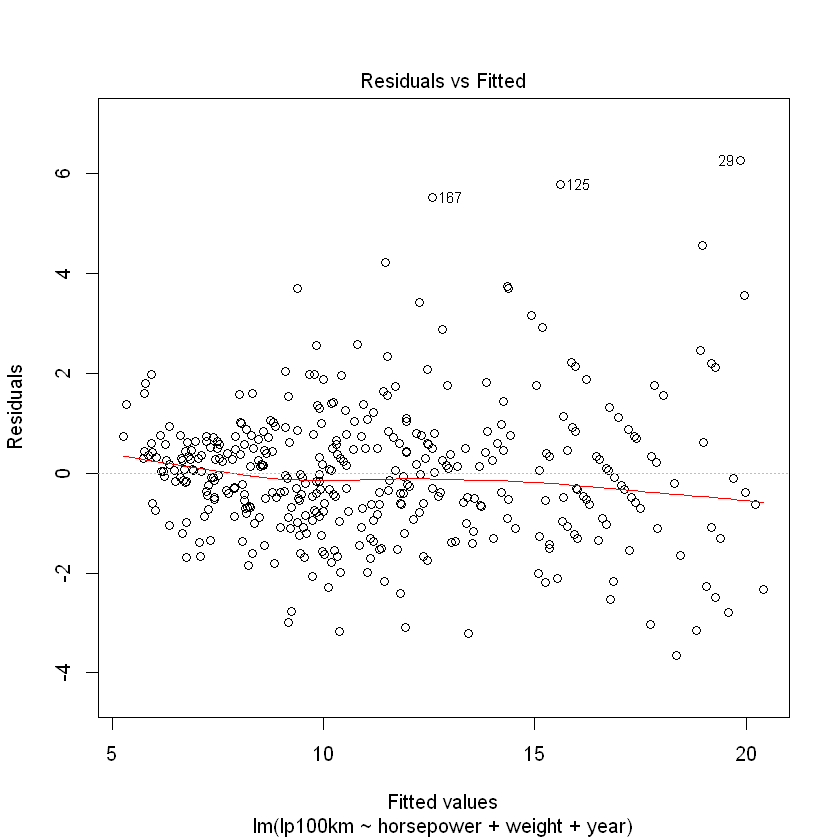

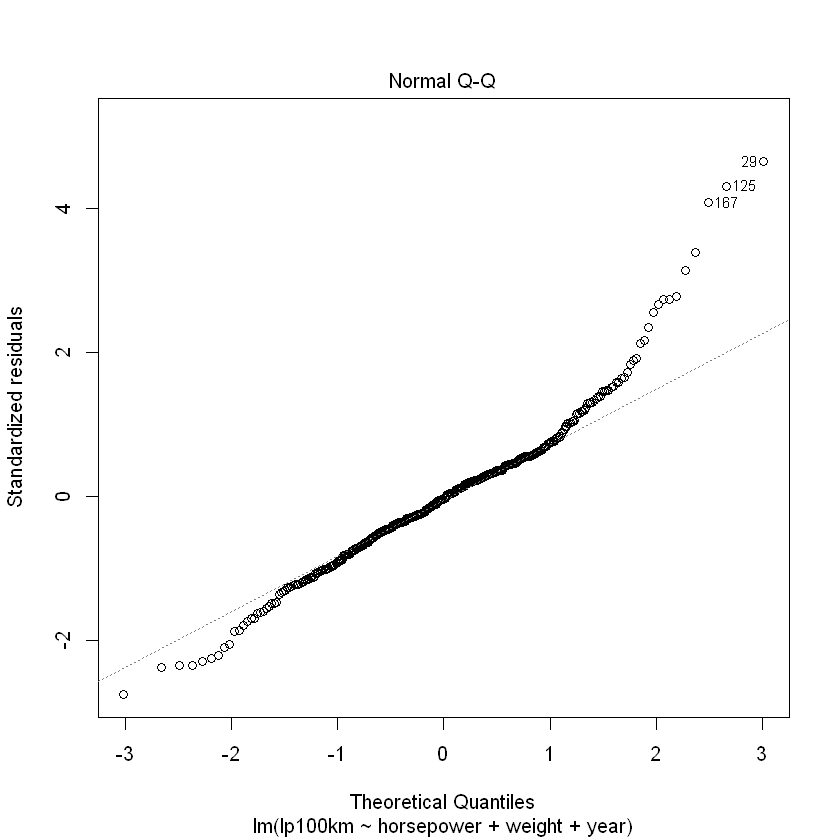

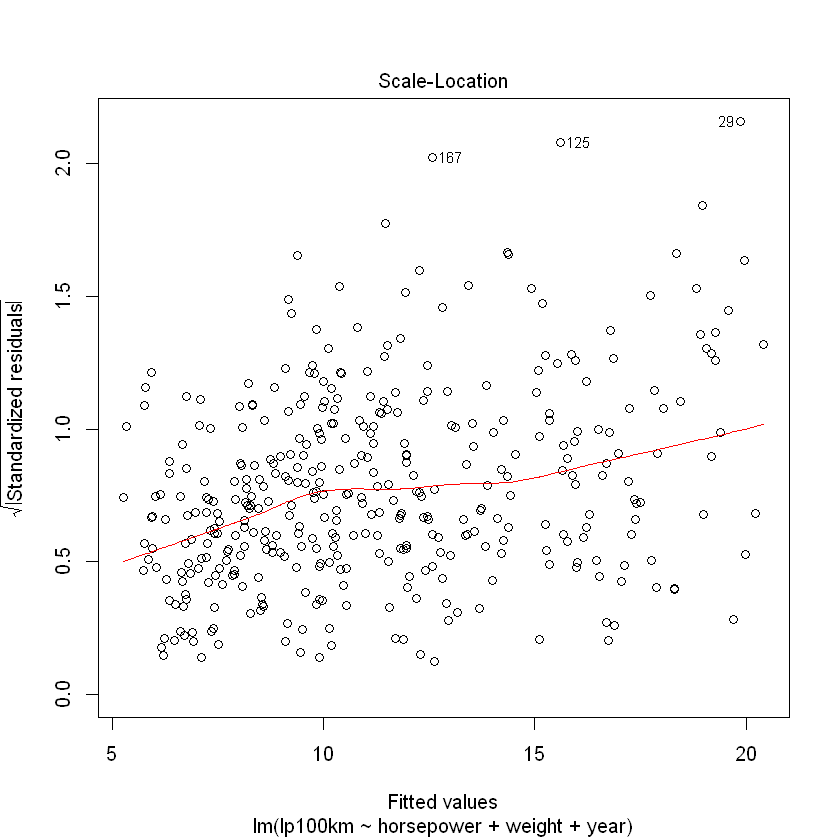

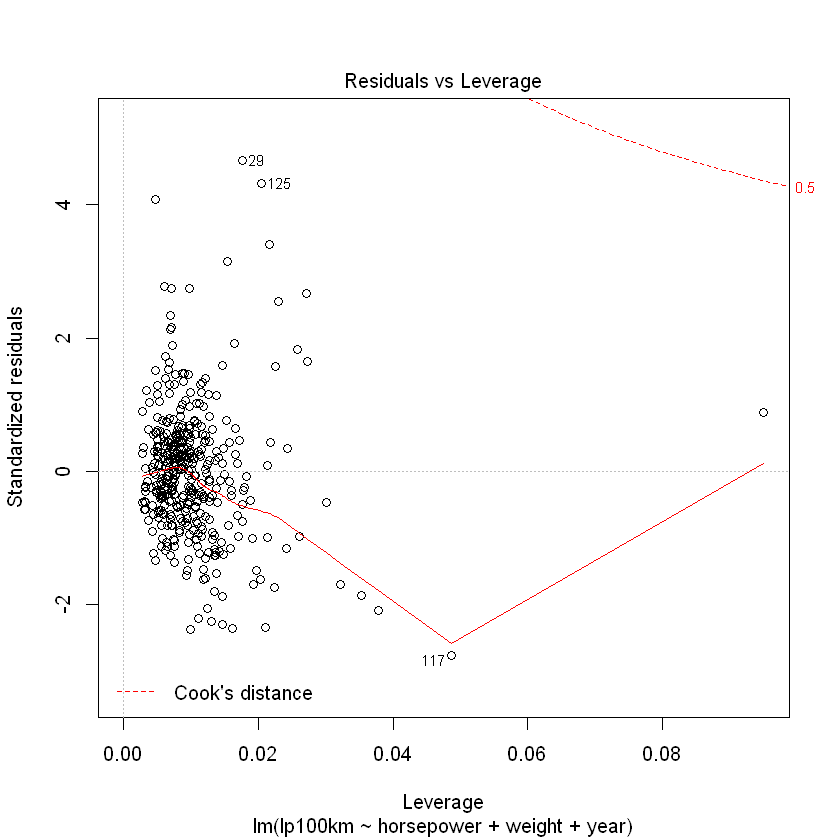

In [66]:
plot(lm.chosen)

Have a look at those observations with large standized residuals.

In [86]:
mpg[c(165,124,29,116),] 
lm.chosen$fitted.values[c(165,124,29,116)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,lp100km
,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<fct>,<chr>,<dbl>
167,13,8,302,129,3169,12.0,75,1,ford mustang ii,18.09343
125,11,8,350,180,3664,11.0,73,1,oldsmobile omega,21.38314
29,9,8,304,193,4732,18.5,70,1,hi 1200d,26.13495
117,16,8,400,230,4278,9.5,73,1,pontiac grand prix,14.70091


167      125       29      117 
12.57162 15.59541 19.87441 18.34536

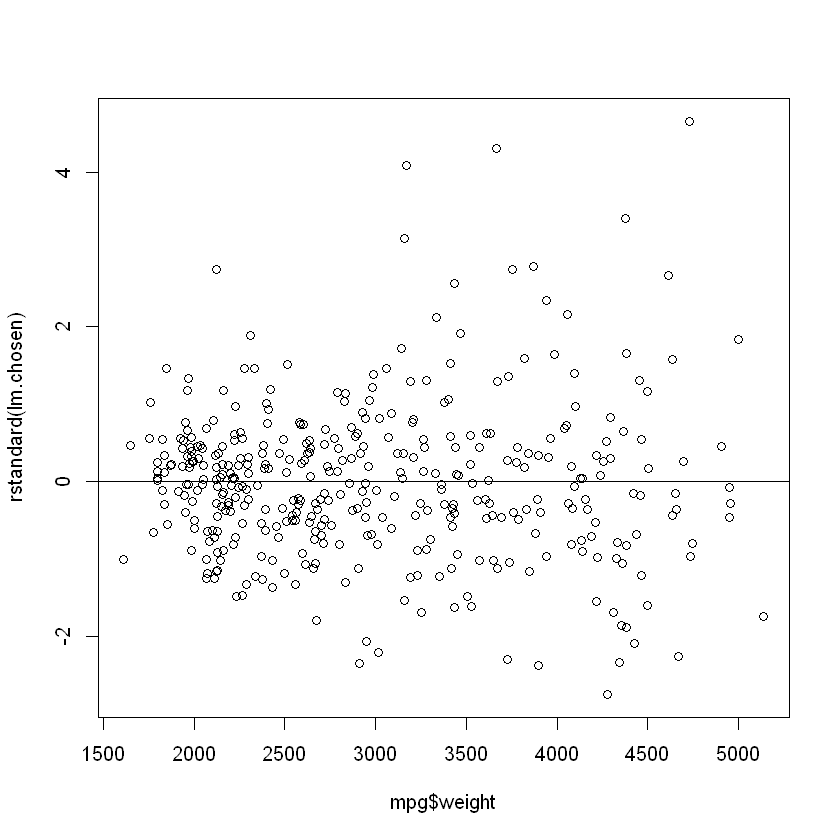

In [90]:
plot(mpg$weight, rstandard(lm.chosen))
abline(0,0)

           Test stat Pr(>|Test stat|)  
horsepower   -0.6325          0.52746  
weight       -0.1752          0.86105  
year         -2.2551          0.02468 *
Tukey test    0.6604          0.50897  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


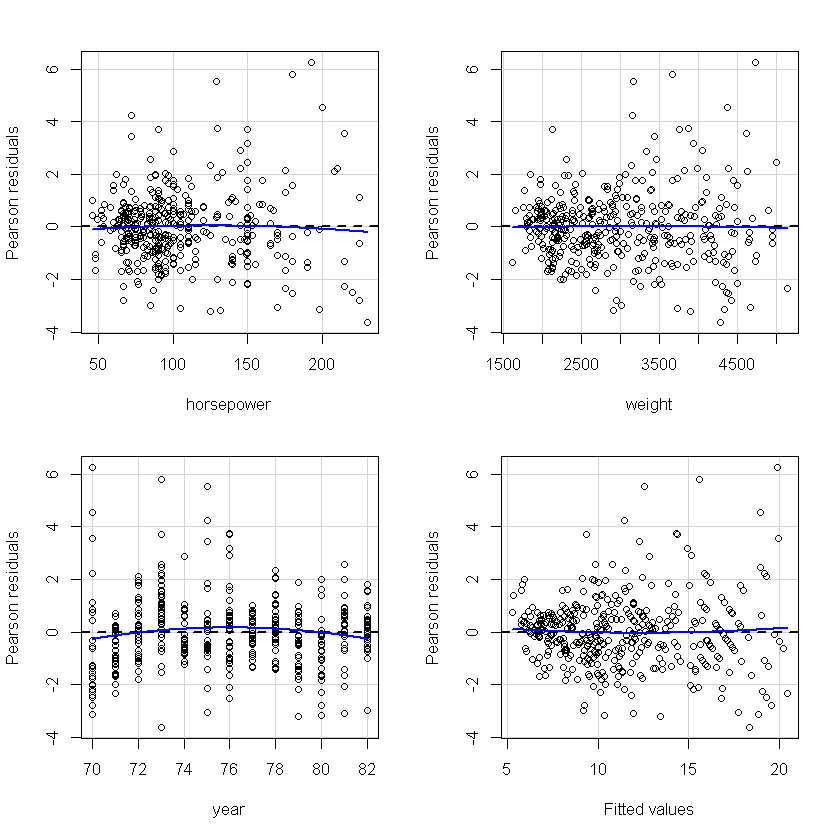

In [69]:
car::residualPlots(lm.chosen)

# Analysis of Variance and Analysis of Covariance: Does `Origin` matter?

In [51]:
summary(lm.origin.anova<-lm(lp100km~origin,data=mpg))
anova(lm.origin.anova)


Call:
lm(formula = lp100km ~ origin, data = mpg)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.8717 -1.9078 -0.3093  1.7981 13.2321 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  12.9028     0.2092  61.683   <2e-16 ***
origin2      -3.9139     0.4488  -8.721   <2e-16 ***
origin3      -4.8396     0.4236 -11.424   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.274 on 389 degrees of freedom
Multiple R-squared:  0.3037,	Adjusted R-squared:  0.3002 
F-statistic: 84.85 on 2 and 389 DF,  p-value: < 2.2e-16


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
origin,2,1819.246,909.62299,84.8516,2.620973e-31
Residuals,389,4170.144,10.72016,NA,NA


It seems that the means of the fuel consumption do differ from different origins. However, after we consider other predictors in the model, origin no longer matters in terms of prediction.

In [53]:
summary(lm.origin.ancova<-lm(lp100km~horsepower+year+weight+origin,data=mpg))
anova(lm.origin.ancova)


Call:
lm(formula = lp100km ~ horsepower + year + weight + origin, data = mpg)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.6210 -0.7872 -0.0287  0.6553  6.3275 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 24.4913315  1.6919185  14.475  < 2e-16 ***
horsepower   0.0189366  0.0037703   5.023 7.81e-07 ***
year        -0.3073573  0.0208087 -14.771  < 2e-16 ***
weight       0.0027845  0.0001779  15.653  < 2e-16 ***
origin2     -0.5442584  0.2092972  -2.600  0.00967 ** 
origin3     -0.3223711  0.2115867  -1.524  0.12843    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.347 on 386 degrees of freedom
Multiple R-squared:  0.883,	Adjusted R-squared:  0.8815 
F-statistic: 582.9 on 5 and 386 DF,  p-value: < 2.2e-16


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
horsepower,1,4376.43276,4376.432762,2411.693408,4.162477e-168
year,1,296.65496,296.654959,163.475792,1.863312e-31
weight,1,603.09696,603.096959,332.344866,5.170457e-54
origin,2,12.74137,6.370683,3.510653,3.083499e-02
Residuals,386,700.46343,1.814672,NA,NA


# Principle Component Analysis

In [57]:
PCA<-princomp(mpg[,2:7],cor = TRUE)
summary(PCA)
PCA$loadings

Importance of components:
                          Comp.1    Comp.2    Comp.3    Comp.4     Comp.5
Standard deviation     2.0632867 0.9163022 0.8202555 0.3645117 0.24733146
Proportion of Variance 0.7095253 0.1399349 0.1121365 0.0221448 0.01019548
Cumulative Proportion  0.7095253 0.8494603 0.9615968 0.9837416 0.99393704
                            Comp.6
Standard deviation     0.190729592
Proportion of Variance 0.006062963
Cumulative Proportion  1.000000000


Loadings:
             Comp.1 Comp.2 Comp.3 Comp.4 Comp.5 Comp.6
cylinders     0.455  0.189  0.168  0.660  0.274  0.467
displacement  0.469  0.163  0.132  0.188        -0.837
horsepower    0.464        -0.125 -0.618  0.613  0.104
weight        0.446  0.257  0.270 -0.351 -0.685  0.262
acceleration -0.325  0.221  0.864 -0.148  0.274       
year         -0.232  0.907 -0.345                     

               Comp.1 Comp.2 Comp.3 Comp.4 Comp.5 Comp.6
SS loadings     1.000  1.000  1.000  1.000  1.000  1.000
Proportion Var  0.167  0.167  0.167  0.167  0.167  0.167
Cumulative Var  0.167  0.333  0.500  0.667  0.833  1.000

In [65]:
PCA.z<-as.matrix(mpg[,2:7])%*%eigen(cor(mpg[,2:7]))$vectors

In [64]:
summary(lm(mpg$lp100km~1+PCA.z[,1]+PCA.z[,2]+PCA.z[,3]))


Call:
lm(formula = mpg$lp100km ~ 1 + PCA.z[, 1] + PCA.z[, 2] + PCA.z[, 
    3])

Residuals:
    Min      1Q  Median      3Q     Max 
-4.1457 -0.7661 -0.0445  0.5944  6.9730 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 23.351559   1.554832   15.02   <2e-16 ***
PCA.z[, 1]  -0.066421   0.004122  -16.11   <2e-16 ***
PCA.z[, 2]  -0.256559   0.017337  -14.80   <2e-16 ***
PCA.z[, 3]  -0.143381   0.013291  -10.79   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.377 on 388 degrees of freedom
Multiple R-squared:  0.8771,	Adjusted R-squared:  0.8761 
F-statistic:   923 on 3 and 388 DF,  p-value: < 2.2e-16
